In [1]:
import math, time, random, datetime
%matplotlib inline
#Data Manipulation
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#Preprocessing
from sklearn.preprocessing import (OneHotEncoder, 
LabelEncoder, label_binarize)

#Machine learning models
import catboost
from sklearn.model_selection import train_test_split
from sklearn import (model_selection, tree, preprocessing,
metrics, linear_model)
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import (LinearRegression, 
LogisticRegression, SGDClassifier)
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

#rebels and ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [145]:
#Import train and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv') #e.g of what a submisision should look like

In [3]:
train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [4]:
#View the training data
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


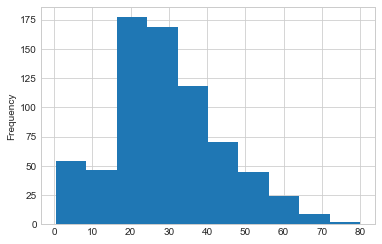

In [5]:
train.Age.plot.hist()
#train.Fare.plot.hist()

In [6]:
#View the test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#View the example submission dataframe
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
#see the data statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


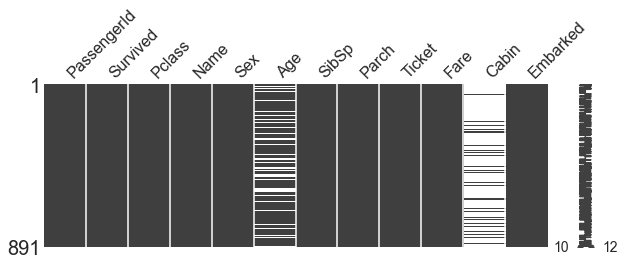

In [9]:
#graphic of missing values
missingno.matrix(train, figsize = (10,3))

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
#to see the number of missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# To Perform data analysis, we are going to see two new dataframe:
    i. to explore discretised variables
    ii. to explore continuous variables

In [146]:
df_bin = pd.DataFrame() #for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

In [13]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64


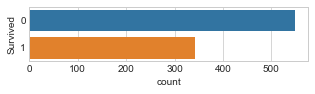

In [14]:
#get the info of the number of people survived
fig = plt.figure(figsize = (5,1))
sns.countplot(y ='Survived', data = train)
print(train.Survived.value_counts())

In [147]:
#adding  this to subset dataframes
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [16]:
print(len(df_bin))

891


In [17]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


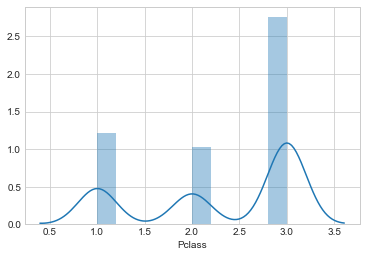

In [18]:
#to get the idea of the data distribution according to the passenger  class
sns.distplot(train.Pclass)

In [19]:
#give the number of missing variables in Pclass
train.Pclass.isnull().sum()

0

In [148]:
#since there  is no missing  values adding Pclass in the sub-dataframes
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

In [21]:
df_bin.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [22]:
#Gives the total  number of different names in the data
train.Name.value_counts()

Petterson, Mr. Johan Emil      1
Braund, Mr. Lewis Richard      1
Lefebre, Miss. Jeannie         1
Crease, Mr. Ernest James       1
Betros, Mr. Tannous            1
                              ..
Henry, Miss. Delia             1
Meo, Mr. Alfonzo               1
Olsvigen, Mr. Thor Anderson    1
Moor, Master. Meier            1
Douglas, Mr. Walter Donald     1
Name: Name, Length: 891, dtype: int64

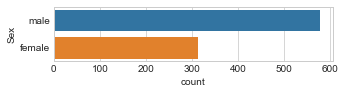

In [23]:
#gives the visualization of Sex distribution
plt.figure(figsize = (5,1))
sns.countplot(y = 'Sex', data = train)


In [24]:
#Checking the  missing value in the sex column
train.Sex.isnull().sum()

0

In [181]:
#adding to the sub-dataframe
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1,0)
df_con['Sex'] = train['Sex']

In [182]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


Function to create count and distribution visualizations

In [27]:
def plotCountDist(data,bin_df, label_column, target_column, 
                  figsize, use_bin_df = False):
    """
    Function to plot counts and distributions of a 
    label variable and target variable side by side.
    data = target dataframe
    bin_df = binned dataframe for countplot
    label_column = binary labelled column
    target_column = column we want to view counts and distributions
    use_bin_df = whether or not to use the bin_df, default False
    """
    if use_bin_df:
        fig = plt.figure(figsize = figsize)
        plt.subplot(1,2,1)
        sns.countplot(y = target_column, data = bin_df);
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column] == 1][target_column],
                     kde_kws = {"label":"survived"})
        sns.distplot(data.loc[data[label_column] == 0][target_column],
                    kde_kws = {"label":"Did not survived"})
        
    else:
        fig = plt.figure(figsize = figsize)
        plt.subplot(1,2,1)
        sns.countplot(y = target_column, data = data);
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column] == 1][target_column],
                     kde_kws = {"label":"survived"})
        sns.distplot(data.loc[data[label_column] == 0][target_column],
                    kde_kws = {"label":"Did not survived"})


In [28]:
train.SibSp.isnull().sum()

0

In [151]:
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

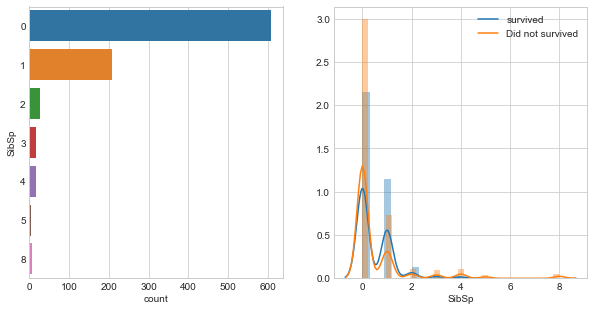

In [30]:
#Visualise the counts of sibling and spouse and the distribution of the values
#against survived
plotCountDist(train, 
              bin_df = df_bin,
              label_column = 'Survived',
              target_column = 'SibSp',
              figsize = (10,5))

In [31]:
train.Parch.isnull().sum()

0

In [152]:
#add parch to the sub-dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']


In [33]:
train.Ticket.isnull().sum()

0

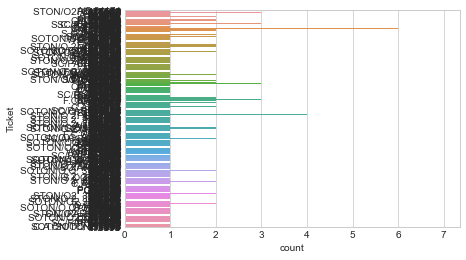

In [34]:
#how many types of tickets were there?
sns.countplot(y = 'Ticket', data = train)


In [35]:
train.Ticket.value_counts()

CA. 2343    7
347082      7
1601        7
CA 2144     6
3101295     6
           ..
330909      1
2624        1
244361      1
367229      1
347466      1
Name: Ticket, Length: 681, dtype: int64

In [36]:
#number of unique tickets
print("There are {} unique Tickets values.".format
      (len(train.Ticket.unique())))

There are 681 unique Tickets values.


In [37]:
train.Fare.isnull().sum()

0

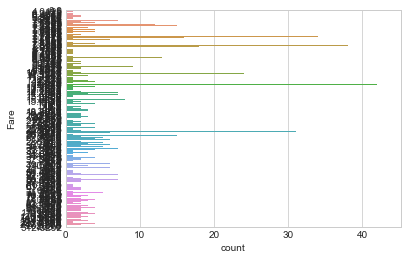

In [38]:
sns.countplot(y='Fare', data = train)

In [39]:
train.Fare.dtype

dtype('float64')

In [40]:
len(train.Fare.unique())

248

In [153]:
#add Fare to the sub-dataframe
df_con['Fare'] = train['Fare']
df_bin['Fare'] = pd.cut(train['Fare'], bins = 5)

In [154]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,0,1,0,"(-0.512, 102.466]"
1,1,1,1,1,0,"(-0.512, 102.466]"
2,1,3,1,0,0,"(-0.512, 102.466]"
3,1,1,1,1,0,"(-0.512, 102.466]"
4,0,3,0,0,0,"(-0.512, 102.466]"


In [43]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

In [44]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500


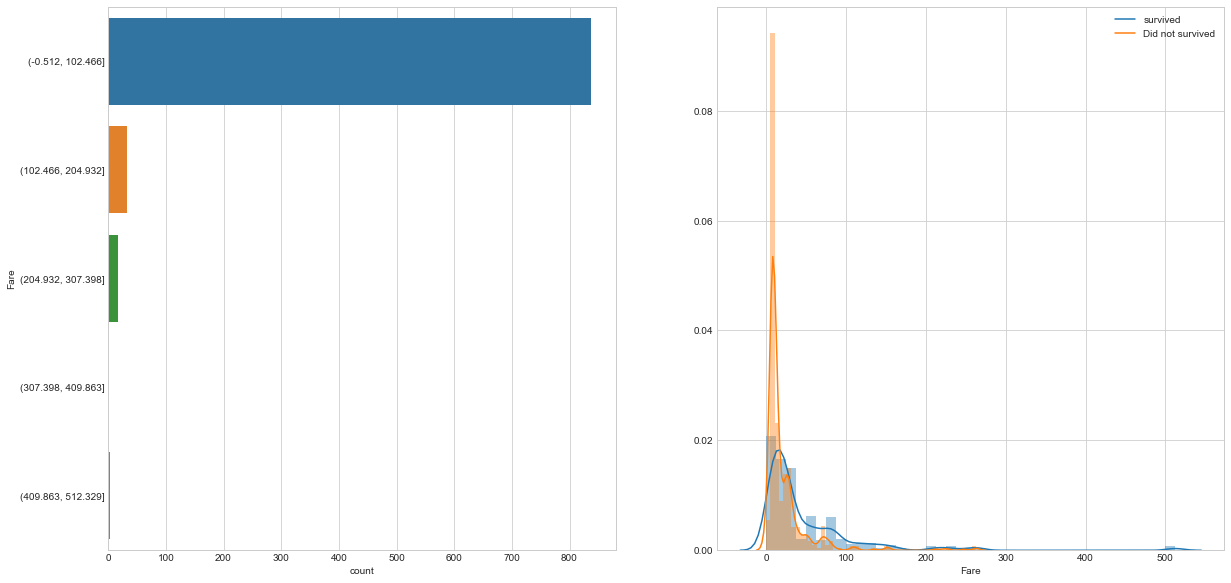

In [45]:
plotCountDist(data = train,
             bin_df = df_bin,
             label_column= 'Survived',
             target_column= 'Fare',
             figsize= (20,10),
             use_bin_df = True)

In [46]:
train.Cabin.isnull().sum()

687

In [47]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
C22 C26        3
              ..
E34            1
D30            1
B73            1
E38            1
B101           1
Name: Cabin, Length: 147, dtype: int64

In [48]:
train.Embarked.isnull().sum()

2

In [49]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

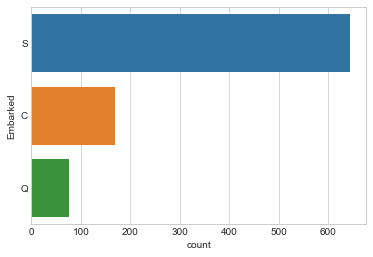

In [50]:
sns.countplot(y = 'Embarked', data = train)

In [155]:
#add Embarked to subdataframe
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [156]:
#Drop missing rows from the data
print(len(df_con))
df_con = df_con.dropna(subset = ['Embarked'])
df_bin =df_bin.dropna(subset = ['Embarked'])
print(len(df_con))

891
889


In [157]:
#One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns = one_hot_cols)
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [54]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [158]:
df_con_enc = df_con.apply(LabelEncoder().fit_transform)
df_con_enc.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,18,2
1,1,0,0,1,0,207,0
2,1,2,0,0,0,41,2
3,1,0,0,1,0,189,2
4,0,2,1,0,0,43,2


In [159]:
#one hot enconde the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], prefix = 'embarked')
df_sex_one_hot = pd.get_dummies(df_con['Sex'], prefix = 'sex')
df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], prefix = 'pclass')

In [160]:
#combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con,
                       df_embarked_one_hot,
                       df_sex_one_hot,
                       df_plcass_one_hot], axis = 1)
#Drop the original categorical columns (because now they've been one hot eoncoded)
df_con_enc = df_con_enc.drop(['Pclass','Sex','Embarked'], axis = 1)

In [58]:
df_con_enc.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


Machine Learning Models


In [161]:
#Selecting the dataframe we want to use first for predictions
selected_df = df_con_enc

In [60]:
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [162]:
#Split the dataframe into data and lables
TrainData = selected_df.drop('Survived',axis = 1)
TrainLabels = selected_df.Survived

TrainLabels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [62]:
TrainData.shape

(889, 11)

In [63]:
TrainData.head()


,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [163]:
TrainLabels.shape, TrainData.shape

((889,), (889, 11))

In [164]:
#Fit function that runs the requested algorithm and returns the accuracy metrics
from sklearn.model_selection import cross_val_predict
def fit_ml_algorithm(algorithm, TrainData, TrainLabels, cv):
    """
    algorithm: learning algorithm
    TrainData: Train Input Data
    TrainLables: Train Output Data
    Cross-Validation (CV): The training data is split into k smaller sets
                           - The model is trained on (k-1) of the folds as training data;
                           - The resulting model is validated on the remianign part of 
                             the data (i.e., it is used to compute a preformance measure 
                             such as accuracy).
    n_jobs: The number of CPUs to used to do the computation. 
            -1 means using all the processors.
    """
    start_time = time.time()
    model = algorithm.fit(TrainData, TrainLabels)
    acc = round(model.score(TrainData, TrainLabels)*100,2)
    
    #Cross Validation
    train_pred = model_selection.cross_val_predict(algorithm, TrainData, 
                                                 TrainLabels,
                                                 cv = cv,
                                                 n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(TrainLabels, train_pred)*100,2)
    log_time = (time.time() - start_time)
    
    print("Accuracy: ", acc)
    print("Acuracy CV 10-Fold: ", acc_cv)
    print("Running Time: ", datetime.timedelta(seconds = log_time))
    
    
    

In [66]:
#Logistic Regression
fit_ml_algorithm(LogisticRegression(),TrainData, TrainLabels,10)

Accuracy:  79.98
Acuracy CV 10-Fold:  79.42
Running Time:  0:00:02.281896


In [67]:
#K-Nearest Neighbours
fit_ml_algorithm(KNeighborsClassifier(),TrainData, TrainLabels,10)

Accuracy:  83.46
Acuracy CV 10-Fold:  76.72
Running Time:  0:00:00.129652


In [68]:
#Gaussian Naive Nayes
fit_ml_algorithm(GaussianNB(),TrainData, TrainLabels,10)

Accuracy:  78.52
Acuracy CV 10-Fold:  77.95
Running Time:  0:00:00.049867


In [69]:
#Linear Support Vector Machines (SVC)
fit_ml_algorithm(LinearSVC(),TrainData, TrainLabels,10)

Accuracy:  78.29
Acuracy CV 10-Fold:  77.28
Running Time:  0:00:00.248334


In [70]:
#Stochastic Gradient Descent
fit_ml_algorithm(SGDClassifier(),TrainData, TrainLabels,10)

Accuracy:  75.59
Acuracy CV 10-Fold:  74.13
Running Time:  0:00:00.057844


In [71]:
#Decision Tree Classifier

dct = fit_ml_algorithm(DecisionTreeClassifier(),TrainData, TrainLabels,10)

Accuracy:  92.46
Acuracy CV 10-Fold:  80.43
Running Time:  0:00:00.099733


In [72]:
#Gradient Boost Trees
fit_ml_algorithm(GradientBoostingClassifier(),TrainData, TrainLabels,10)

Accuracy:  86.61
Acuracy CV 10-Fold:  80.65
Running Time:  0:00:00.566486


In [73]:
#CatBoost ALgorithm
fit_ml_algorithm(CatBoostClassifier(),TrainData, TrainLabels,10)

Learning rate set to 0.016206
0:	learn: 0.6828638	total: 55.6ms	remaining: 55.5s
1:	learn: 0.6732098	total: 57.7ms	remaining: 28.8s
2:	learn: 0.6639999	total: 60.1ms	remaining: 20s
3:	learn: 0.6564378	total: 61.5ms	remaining: 15.3s
4:	learn: 0.6471884	total: 63.6ms	remaining: 12.6s
5:	learn: 0.6386126	total: 65.6ms	remaining: 10.9s
6:	learn: 0.6304233	total: 67.8ms	remaining: 9.62s
7:	learn: 0.6228683	total: 70ms	remaining: 8.68s
8:	learn: 0.6154745	total: 72.2ms	remaining: 7.95s
9:	learn: 0.6085770	total: 74.9ms	remaining: 7.42s
10:	learn: 0.6015518	total: 76.9ms	remaining: 6.92s
11:	learn: 0.5962607	total: 79.4ms	remaining: 6.54s
12:	learn: 0.5895406	total: 81.6ms	remaining: 6.2s
13:	learn: 0.5838336	total: 84.3ms	remaining: 5.93s
14:	learn: 0.5778443	total: 86.8ms	remaining: 5.7s
15:	learn: 0.5722189	total: 89.3ms	remaining: 5.49s
16:	learn: 0.5667278	total: 91.9ms	remaining: 5.31s
17:	learn: 0.5617570	total: 93.7ms	remaining: 5.11s
18:	learn: 0.5565164	total: 95.8ms	remaining: 4.94

237:	learn: 0.3767522	total: 465ms	remaining: 1.49s
238:	learn: 0.3766153	total: 467ms	remaining: 1.49s
239:	learn: 0.3763853	total: 469ms	remaining: 1.49s
240:	learn: 0.3761919	total: 471ms	remaining: 1.48s
241:	learn: 0.3760439	total: 473ms	remaining: 1.48s
242:	learn: 0.3759255	total: 475ms	remaining: 1.48s
243:	learn: 0.3759028	total: 476ms	remaining: 1.47s
244:	learn: 0.3758419	total: 478ms	remaining: 1.47s
245:	learn: 0.3757205	total: 479ms	remaining: 1.47s
246:	learn: 0.3755524	total: 481ms	remaining: 1.47s
247:	learn: 0.3754837	total: 484ms	remaining: 1.47s
248:	learn: 0.3754730	total: 485ms	remaining: 1.46s
249:	learn: 0.3753125	total: 487ms	remaining: 1.46s
250:	learn: 0.3751644	total: 488ms	remaining: 1.46s
251:	learn: 0.3748762	total: 490ms	remaining: 1.45s
252:	learn: 0.3748377	total: 492ms	remaining: 1.45s
253:	learn: 0.3747368	total: 493ms	remaining: 1.45s
254:	learn: 0.3745972	total: 495ms	remaining: 1.45s
255:	learn: 0.3743049	total: 497ms	remaining: 1.44s
256:	learn: 

440:	learn: 0.3493705	total: 793ms	remaining: 1s
441:	learn: 0.3492373	total: 795ms	remaining: 1s
442:	learn: 0.3491851	total: 797ms	remaining: 1s
443:	learn: 0.3490560	total: 799ms	remaining: 1000ms
444:	learn: 0.3489267	total: 800ms	remaining: 998ms
445:	learn: 0.3486423	total: 802ms	remaining: 996ms
446:	learn: 0.3485216	total: 804ms	remaining: 995ms
447:	learn: 0.3484173	total: 806ms	remaining: 993ms
448:	learn: 0.3481970	total: 808ms	remaining: 991ms
449:	learn: 0.3479585	total: 810ms	remaining: 989ms
450:	learn: 0.3479005	total: 811ms	remaining: 987ms
451:	learn: 0.3478008	total: 812ms	remaining: 985ms
452:	learn: 0.3476831	total: 814ms	remaining: 982ms
453:	learn: 0.3474098	total: 815ms	remaining: 980ms
454:	learn: 0.3472523	total: 817ms	remaining: 978ms
455:	learn: 0.3469993	total: 819ms	remaining: 977ms
456:	learn: 0.3468260	total: 821ms	remaining: 975ms
457:	learn: 0.3466533	total: 822ms	remaining: 973ms
458:	learn: 0.3465568	total: 824ms	remaining: 971ms
459:	learn: 0.346350

629:	learn: 0.3193006	total: 1.12s	remaining: 657ms
630:	learn: 0.3192029	total: 1.12s	remaining: 655ms
631:	learn: 0.3189901	total: 1.12s	remaining: 653ms
632:	learn: 0.3188256	total: 1.12s	remaining: 652ms
633:	learn: 0.3186978	total: 1.13s	remaining: 650ms
634:	learn: 0.3184799	total: 1.13s	remaining: 648ms
635:	learn: 0.3184282	total: 1.13s	remaining: 647ms
636:	learn: 0.3181856	total: 1.13s	remaining: 645ms
637:	learn: 0.3179493	total: 1.13s	remaining: 643ms
638:	learn: 0.3178672	total: 1.14s	remaining: 641ms
639:	learn: 0.3177499	total: 1.14s	remaining: 640ms
640:	learn: 0.3176523	total: 1.14s	remaining: 638ms
641:	learn: 0.3175510	total: 1.14s	remaining: 636ms
642:	learn: 0.3173818	total: 1.14s	remaining: 634ms
643:	learn: 0.3171561	total: 1.14s	remaining: 632ms
644:	learn: 0.3170544	total: 1.15s	remaining: 631ms
645:	learn: 0.3169969	total: 1.15s	remaining: 629ms
646:	learn: 0.3168148	total: 1.15s	remaining: 627ms
647:	learn: 0.3167575	total: 1.15s	remaining: 625ms
648:	learn: 

828:	learn: 0.2949651	total: 1.45s	remaining: 298ms
829:	learn: 0.2948876	total: 1.45s	remaining: 296ms
830:	learn: 0.2947322	total: 1.45s	remaining: 295ms
831:	learn: 0.2946205	total: 1.45s	remaining: 293ms
832:	learn: 0.2945927	total: 1.45s	remaining: 291ms
833:	learn: 0.2945544	total: 1.45s	remaining: 289ms
834:	learn: 0.2944473	total: 1.46s	remaining: 288ms
835:	learn: 0.2944058	total: 1.46s	remaining: 286ms
836:	learn: 0.2942524	total: 1.46s	remaining: 284ms
837:	learn: 0.2941142	total: 1.46s	remaining: 283ms
838:	learn: 0.2939947	total: 1.46s	remaining: 281ms
839:	learn: 0.2939468	total: 1.46s	remaining: 279ms
840:	learn: 0.2938091	total: 1.47s	remaining: 277ms
841:	learn: 0.2936955	total: 1.47s	remaining: 275ms
842:	learn: 0.2936473	total: 1.47s	remaining: 274ms
843:	learn: 0.2935109	total: 1.47s	remaining: 272ms
844:	learn: 0.2933652	total: 1.47s	remaining: 270ms
845:	learn: 0.2932742	total: 1.47s	remaining: 268ms
846:	learn: 0.2931215	total: 1.48s	remaining: 267ms
847:	learn: 

Accuracy:  90.21
Acuracy CV 10-Fold:  81.44
Running Time:  0:00:13.567015


In [74]:
cat_features = np.where(TrainData.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [75]:
train_pool = Pool(TrainData, TrainLabels, cat_features)

catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(TrainData, TrainLabels) * 100, 2)

Learning rate set to 0.016206


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6818450	total: 49.1ms	remaining: 49s
1:	learn: 0.6759072	total: 67.3ms	remaining: 33.6s
2:	learn: 0.6673021	total: 88.6ms	remaining: 29.4s
3:	learn: 0.6588371	total: 105ms	remaining: 26.1s
4:	learn: 0.6509958	total: 114ms	remaining: 22.7s
5:	learn: 0.6426722	total: 128ms	remaining: 21.1s
6:	learn: 0.6353671	total: 142ms	remaining: 20.1s
7:	learn: 0.6278300	total: 174ms	remaining: 21.6s
8:	learn: 0.6199946	total: 191ms	remaining: 21s
9:	learn: 0.6157245	total: 192ms	remaining: 19s
10:	learn: 0.6093044	total: 194ms	remaining: 17.4s
11:	learn: 0.6019208	total: 206ms	remaining: 16.9s
12:	learn: 0.5944882	total: 213ms	remaining: 16.2s
13:	learn: 0.5880221	total: 230ms	remaining: 16.2s
14:	learn: 0.5837337	total: 237ms	remaining: 15.6s
15:	learn: 0.5777183	total: 245ms	remaining: 15.1s
16:	learn: 0.5724198	total: 247ms	remaining: 14.3s
17:	learn: 0.5670410	total: 268ms	remaining: 14.6s
18:	learn: 0.5619492	total: 281ms	remaining: 14.5s
19:	learn: 0.5575732	total: 283ms	remaining:

172:	learn: 0.3985617	total: 1.7s	remaining: 8.11s
173:	learn: 0.3981868	total: 1.73s	remaining: 8.19s
174:	learn: 0.3979735	total: 1.75s	remaining: 8.26s
175:	learn: 0.3977840	total: 1.76s	remaining: 8.26s
176:	learn: 0.3977546	total: 1.77s	remaining: 8.22s
177:	learn: 0.3973830	total: 1.77s	remaining: 8.2s
178:	learn: 0.3973563	total: 1.78s	remaining: 8.17s
179:	learn: 0.3972078	total: 1.81s	remaining: 8.23s
180:	learn: 0.3969259	total: 1.82s	remaining: 8.23s
181:	learn: 0.3967835	total: 1.82s	remaining: 8.18s
182:	learn: 0.3966142	total: 1.82s	remaining: 8.14s
183:	learn: 0.3961636	total: 1.84s	remaining: 8.15s
184:	learn: 0.3960782	total: 1.84s	remaining: 8.11s
185:	learn: 0.3960695	total: 1.84s	remaining: 8.06s
186:	learn: 0.3957027	total: 1.86s	remaining: 8.08s
187:	learn: 0.3956815	total: 1.86s	remaining: 8.04s
188:	learn: 0.3952997	total: 1.87s	remaining: 8.04s
189:	learn: 0.3947855	total: 1.88s	remaining: 8.02s
190:	learn: 0.3946791	total: 1.89s	remaining: 8.02s
191:	learn: 0.

340:	learn: 0.3708059	total: 2.94s	remaining: 5.69s
341:	learn: 0.3707989	total: 2.94s	remaining: 5.67s
342:	learn: 0.3706265	total: 2.95s	remaining: 5.65s
343:	learn: 0.3705662	total: 2.96s	remaining: 5.65s
344:	learn: 0.3702255	total: 2.97s	remaining: 5.64s
345:	learn: 0.3700147	total: 2.98s	remaining: 5.63s
346:	learn: 0.3700076	total: 2.98s	remaining: 5.61s
347:	learn: 0.3698171	total: 2.99s	remaining: 5.6s
348:	learn: 0.3698109	total: 2.99s	remaining: 5.57s
349:	learn: 0.3697021	total: 2.99s	remaining: 5.55s
350:	learn: 0.3697021	total: 2.99s	remaining: 5.53s
351:	learn: 0.3694261	total: 2.99s	remaining: 5.51s
352:	learn: 0.3692587	total: 3s	remaining: 5.49s
353:	learn: 0.3691397	total: 3s	remaining: 5.48s
354:	learn: 0.3691397	total: 3s	remaining: 5.46s
355:	learn: 0.3689623	total: 3.01s	remaining: 5.45s
356:	learn: 0.3689522	total: 3.01s	remaining: 5.43s
357:	learn: 0.3687593	total: 3.02s	remaining: 5.41s
358:	learn: 0.3687566	total: 3.02s	remaining: 5.39s
359:	learn: 0.3687508	

507:	learn: 0.3522514	total: 4s	remaining: 3.88s
508:	learn: 0.3521316	total: 4.01s	remaining: 3.87s
509:	learn: 0.3520245	total: 4.02s	remaining: 3.86s
510:	learn: 0.3519534	total: 4.02s	remaining: 3.85s
511:	learn: 0.3518235	total: 4.03s	remaining: 3.84s
512:	learn: 0.3517195	total: 4.04s	remaining: 3.83s
513:	learn: 0.3516874	total: 4.04s	remaining: 3.82s
514:	learn: 0.3516119	total: 4.04s	remaining: 3.81s
515:	learn: 0.3514946	total: 4.04s	remaining: 3.79s
516:	learn: 0.3511432	total: 4.06s	remaining: 3.79s
517:	learn: 0.3509660	total: 4.07s	remaining: 3.79s
518:	learn: 0.3508359	total: 4.08s	remaining: 3.78s
519:	learn: 0.3507514	total: 4.08s	remaining: 3.77s
520:	learn: 0.3506303	total: 4.08s	remaining: 3.76s
521:	learn: 0.3505538	total: 4.09s	remaining: 3.75s
522:	learn: 0.3503757	total: 4.11s	remaining: 3.75s
523:	learn: 0.3503575	total: 4.12s	remaining: 3.74s
524:	learn: 0.3501555	total: 4.15s	remaining: 3.75s
525:	learn: 0.3501466	total: 4.15s	remaining: 3.74s
526:	learn: 0.3

675:	learn: 0.3303688	total: 5.71s	remaining: 2.73s
676:	learn: 0.3300493	total: 5.71s	remaining: 2.73s
677:	learn: 0.3297623	total: 5.71s	remaining: 2.71s
678:	learn: 0.3295694	total: 5.73s	remaining: 2.71s
679:	learn: 0.3295432	total: 5.73s	remaining: 2.7s
680:	learn: 0.3293542	total: 5.74s	remaining: 2.69s
681:	learn: 0.3292310	total: 5.75s	remaining: 2.68s
682:	learn: 0.3288891	total: 5.77s	remaining: 2.68s
683:	learn: 0.3288278	total: 5.78s	remaining: 2.67s
684:	learn: 0.3287203	total: 5.79s	remaining: 2.66s
685:	learn: 0.3284333	total: 5.79s	remaining: 2.65s
686:	learn: 0.3283972	total: 5.79s	remaining: 2.64s
687:	learn: 0.3283882	total: 5.8s	remaining: 2.63s
688:	learn: 0.3282992	total: 5.82s	remaining: 2.63s
689:	learn: 0.3282337	total: 5.83s	remaining: 2.62s
690:	learn: 0.3281509	total: 5.84s	remaining: 2.61s
691:	learn: 0.3278926	total: 5.85s	remaining: 2.6s
692:	learn: 0.3277630	total: 5.87s	remaining: 2.6s
693:	learn: 0.3276536	total: 5.88s	remaining: 2.59s
694:	learn: 0.32

837:	learn: 0.3087397	total: 7.42s	remaining: 1.43s
838:	learn: 0.3085640	total: 7.43s	remaining: 1.43s
839:	learn: 0.3083672	total: 7.45s	remaining: 1.42s
840:	learn: 0.3082523	total: 7.46s	remaining: 1.41s
841:	learn: 0.3080834	total: 7.47s	remaining: 1.4s
842:	learn: 0.3080736	total: 7.48s	remaining: 1.39s
843:	learn: 0.3079312	total: 7.49s	remaining: 1.38s
844:	learn: 0.3077964	total: 7.5s	remaining: 1.38s
845:	learn: 0.3077482	total: 7.51s	remaining: 1.37s
846:	learn: 0.3076331	total: 7.52s	remaining: 1.36s
847:	learn: 0.3075775	total: 7.54s	remaining: 1.35s
848:	learn: 0.3074714	total: 7.55s	remaining: 1.34s
849:	learn: 0.3073032	total: 7.55s	remaining: 1.33s
850:	learn: 0.3071608	total: 7.57s	remaining: 1.32s
851:	learn: 0.3069597	total: 7.57s	remaining: 1.31s
852:	learn: 0.3068826	total: 7.58s	remaining: 1.31s
853:	learn: 0.3066932	total: 7.59s	remaining: 1.3s
854:	learn: 0.3064762	total: 7.6s	remaining: 1.29s
855:	learn: 0.3064225	total: 7.61s	remaining: 1.28s
856:	learn: 0.30

In [76]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6740233	test: 0.6747274	best: 0.6747274 (0)	total: 645ms	remaining: 10m 44s
1:	learn: 0.6556334	test: 0.6573982	best: 0.6573982 (1)	total: 978ms	remaining: 8m 8s
2:	learn: 0.6390043	test: 0.6417160	best: 0.6417160 (2)	total: 1.35s	remaining: 7m 28s
3:	learn: 0.6254821	test: 0.6285888	best: 0.6285888 (3)	total: 1.57s	remaining: 6m 30s
4:	learn: 0.6108179	test: 0.6145866	best: 0.6145866 (4)	total: 1.86s	remaining: 6m 11s
5:	learn: 0.5983980	test: 0.6025400	best: 0.6025400 (5)	total: 2.15s	remaining: 5m 55s
6:	learn: 0.5875155	test: 0.5927693	best: 0.5927693 (6)	total: 2.36s	remaining: 5m 34s
7:	learn: 0.5756412	test: 0.5818428	best: 0.5818428 (7)	total: 2.63s	remaining: 5m 26s
8:	learn: 0.5653070	test: 0.5721953	best: 0.5721953 (8)	total: 2.89s	remaining: 5m 17s
9:	learn: 0.5570628	test: 0.5642644	best: 0.5642644 (9)	total: 3.13s	remaining: 5m 9s
10:	learn: 0.5487046	test: 0.5565424	best: 0.5565424 (10)	total: 3.39s	remaining: 5m 4s
11:	learn: 0.5406204	test: 0.5492020	best: 

93:	learn: 0.3937050	test: 0.4409354	best: 0.4409354 (93)	total: 21.4s	remaining: 3m 26s
94:	learn: 0.3933919	test: 0.4409780	best: 0.4409354 (93)	total: 21.6s	remaining: 3m 26s
95:	learn: 0.3927851	test: 0.4407828	best: 0.4407828 (95)	total: 21.9s	remaining: 3m 25s
96:	learn: 0.3923029	test: 0.4406688	best: 0.4406688 (96)	total: 22.1s	remaining: 3m 25s
97:	learn: 0.3919402	test: 0.4405296	best: 0.4405296 (97)	total: 22.2s	remaining: 3m 24s
98:	learn: 0.3915711	test: 0.4404420	best: 0.4404420 (98)	total: 22.5s	remaining: 3m 24s
99:	learn: 0.3909987	test: 0.4403527	best: 0.4403527 (99)	total: 22.7s	remaining: 3m 24s
100:	learn: 0.3905666	test: 0.4404405	best: 0.4403527 (99)	total: 22.9s	remaining: 3m 23s
101:	learn: 0.3901768	test: 0.4404454	best: 0.4403527 (99)	total: 23.1s	remaining: 3m 23s
102:	learn: 0.3899285	test: 0.4404053	best: 0.4403527 (99)	total: 23.3s	remaining: 3m 23s
103:	learn: 0.3896571	test: 0.4404524	best: 0.4403527 (99)	total: 23.6s	remaining: 3m 23s
104:	learn: 0.389

184:	learn: 0.3661519	test: 0.4393712	best: 0.4391489 (149)	total: 40.5s	remaining: 2m 58s
185:	learn: 0.3659943	test: 0.4393512	best: 0.4391489 (149)	total: 40.7s	remaining: 2m 58s
186:	learn: 0.3657226	test: 0.4394000	best: 0.4391489 (149)	total: 40.9s	remaining: 2m 57s
187:	learn: 0.3654819	test: 0.4394471	best: 0.4391489 (149)	total: 41.2s	remaining: 2m 57s
188:	learn: 0.3652661	test: 0.4394072	best: 0.4391489 (149)	total: 41.4s	remaining: 2m 57s
189:	learn: 0.3650167	test: 0.4394156	best: 0.4391489 (149)	total: 41.6s	remaining: 2m 57s
190:	learn: 0.3647915	test: 0.4393913	best: 0.4391489 (149)	total: 41.8s	remaining: 2m 57s
191:	learn: 0.3645980	test: 0.4394497	best: 0.4391489 (149)	total: 42s	remaining: 2m 56s
192:	learn: 0.3643592	test: 0.4394702	best: 0.4391489 (149)	total: 42.2s	remaining: 2m 56s
193:	learn: 0.3641064	test: 0.4394996	best: 0.4391489 (149)	total: 42.4s	remaining: 2m 56s
194:	learn: 0.3638299	test: 0.4396489	best: 0.4391489 (149)	total: 42.6s	remaining: 2m 55s
1

275:	learn: 0.3439432	test: 0.4389080	best: 0.4386758 (237)	total: 1m 1s	remaining: 2m 40s
276:	learn: 0.3437447	test: 0.4389884	best: 0.4386758 (237)	total: 1m 1s	remaining: 2m 40s
277:	learn: 0.3435611	test: 0.4388994	best: 0.4386758 (237)	total: 1m 1s	remaining: 2m 40s
278:	learn: 0.3433153	test: 0.4388662	best: 0.4386758 (237)	total: 1m 2s	remaining: 2m 40s
279:	learn: 0.3431413	test: 0.4388389	best: 0.4386758 (237)	total: 1m 2s	remaining: 2m 40s
280:	learn: 0.3429436	test: 0.4387971	best: 0.4386758 (237)	total: 1m 2s	remaining: 2m 39s
281:	learn: 0.3427226	test: 0.4388202	best: 0.4386758 (237)	total: 1m 2s	remaining: 2m 39s
282:	learn: 0.3425123	test: 0.4387554	best: 0.4386758 (237)	total: 1m 3s	remaining: 2m 39s
283:	learn: 0.3422161	test: 0.4388053	best: 0.4386758 (237)	total: 1m 3s	remaining: 2m 39s
284:	learn: 0.3419056	test: 0.4388506	best: 0.4386758 (237)	total: 1m 3s	remaining: 2m 39s
285:	learn: 0.3416523	test: 0.4388209	best: 0.4386758 (237)	total: 1m 3s	remaining: 2m 39s

365:	learn: 0.3205409	test: 0.4360046	best: 0.4358021 (364)	total: 1m 25s	remaining: 2m 27s
366:	learn: 0.3203511	test: 0.4360488	best: 0.4358021 (364)	total: 1m 25s	remaining: 2m 27s
367:	learn: 0.3200679	test: 0.4360417	best: 0.4358021 (364)	total: 1m 25s	remaining: 2m 27s
368:	learn: 0.3196543	test: 0.4357480	best: 0.4357480 (368)	total: 1m 26s	remaining: 2m 27s
369:	learn: 0.3192791	test: 0.4357112	best: 0.4357112 (369)	total: 1m 26s	remaining: 2m 27s
370:	learn: 0.3190993	test: 0.4356485	best: 0.4356485 (370)	total: 1m 26s	remaining: 2m 27s
371:	learn: 0.3188653	test: 0.4357581	best: 0.4356485 (370)	total: 1m 27s	remaining: 2m 26s
372:	learn: 0.3186184	test: 0.4355066	best: 0.4355066 (372)	total: 1m 27s	remaining: 2m 26s
373:	learn: 0.3182692	test: 0.4355368	best: 0.4355066 (372)	total: 1m 27s	remaining: 2m 26s
374:	learn: 0.3179331	test: 0.4352802	best: 0.4352802 (374)	total: 1m 27s	remaining: 2m 26s
375:	learn: 0.3176956	test: 0.4353628	best: 0.4352802 (374)	total: 1m 28s	remain

455:	learn: 0.2982566	test: 0.4341685	best: 0.4336689 (448)	total: 1m 50s	remaining: 2m 12s
456:	learn: 0.2980739	test: 0.4342371	best: 0.4336689 (448)	total: 1m 51s	remaining: 2m 12s
457:	learn: 0.2977938	test: 0.4342604	best: 0.4336689 (448)	total: 1m 51s	remaining: 2m 11s
458:	learn: 0.2975693	test: 0.4341943	best: 0.4336689 (448)	total: 1m 51s	remaining: 2m 11s
459:	learn: 0.2973059	test: 0.4343999	best: 0.4336689 (448)	total: 1m 52s	remaining: 2m 11s
460:	learn: 0.2971005	test: 0.4343598	best: 0.4336689 (448)	total: 1m 52s	remaining: 2m 11s
461:	learn: 0.2968387	test: 0.4343342	best: 0.4336689 (448)	total: 1m 52s	remaining: 2m 11s
462:	learn: 0.2966573	test: 0.4343744	best: 0.4336689 (448)	total: 1m 52s	remaining: 2m 11s
463:	learn: 0.2964333	test: 0.4344036	best: 0.4336689 (448)	total: 1m 53s	remaining: 2m 10s
464:	learn: 0.2962497	test: 0.4343506	best: 0.4336689 (448)	total: 1m 53s	remaining: 2m 10s
465:	learn: 0.2959934	test: 0.4342968	best: 0.4336689 (448)	total: 1m 53s	remain

546:	learn: 0.2796415	test: 0.4339862	best: 0.4334507 (479)	total: 2m 16s	remaining: 1m 53s
547:	learn: 0.2794718	test: 0.4340032	best: 0.4334507 (479)	total: 2m 16s	remaining: 1m 52s
548:	learn: 0.2792673	test: 0.4340125	best: 0.4334507 (479)	total: 2m 17s	remaining: 1m 52s
549:	learn: 0.2791031	test: 0.4340324	best: 0.4334507 (479)	total: 2m 17s	remaining: 1m 52s
550:	learn: 0.2789707	test: 0.4340273	best: 0.4334507 (479)	total: 2m 17s	remaining: 1m 52s
551:	learn: 0.2787229	test: 0.4339753	best: 0.4334507 (479)	total: 2m 18s	remaining: 1m 52s
552:	learn: 0.2784970	test: 0.4341139	best: 0.4334507 (479)	total: 2m 18s	remaining: 1m 51s
553:	learn: 0.2783621	test: 0.4340464	best: 0.4334507 (479)	total: 2m 18s	remaining: 1m 51s
554:	learn: 0.2782013	test: 0.4341047	best: 0.4334507 (479)	total: 2m 19s	remaining: 1m 51s
555:	learn: 0.2779834	test: 0.4341476	best: 0.4334507 (479)	total: 2m 19s	remaining: 1m 51s
556:	learn: 0.2778291	test: 0.4341945	best: 0.4334507 (479)	total: 2m 19s	remain

636:	learn: 0.2642999	test: 0.4345253	best: 0.4334384 (578)	total: 2m 43s	remaining: 1m 33s
637:	learn: 0.2641353	test: 0.4344229	best: 0.4334384 (578)	total: 2m 43s	remaining: 1m 32s
638:	learn: 0.2639960	test: 0.4344736	best: 0.4334384 (578)	total: 2m 43s	remaining: 1m 32s
639:	learn: 0.2638108	test: 0.4345013	best: 0.4334384 (578)	total: 2m 44s	remaining: 1m 32s
640:	learn: 0.2636671	test: 0.4345955	best: 0.4334384 (578)	total: 2m 44s	remaining: 1m 32s
641:	learn: 0.2634773	test: 0.4345028	best: 0.4334384 (578)	total: 2m 44s	remaining: 1m 31s
642:	learn: 0.2632934	test: 0.4344996	best: 0.4334384 (578)	total: 2m 45s	remaining: 1m 31s
643:	learn: 0.2630986	test: 0.4345874	best: 0.4334384 (578)	total: 2m 45s	remaining: 1m 31s
644:	learn: 0.2629687	test: 0.4345733	best: 0.4334384 (578)	total: 2m 45s	remaining: 1m 31s
645:	learn: 0.2628185	test: 0.4346028	best: 0.4334384 (578)	total: 2m 46s	remaining: 1m 30s
646:	learn: 0.2627089	test: 0.4347427	best: 0.4334384 (578)	total: 2m 46s	remain

726:	learn: 0.2513906	test: 0.4356148	best: 0.4334384 (578)	total: 3m 13s	remaining: 1m 12s
727:	learn: 0.2512304	test: 0.4355698	best: 0.4334384 (578)	total: 3m 13s	remaining: 1m 12s
728:	learn: 0.2510999	test: 0.4355536	best: 0.4334384 (578)	total: 3m 14s	remaining: 1m 12s
729:	learn: 0.2509761	test: 0.4356060	best: 0.4334384 (578)	total: 3m 14s	remaining: 1m 12s
730:	learn: 0.2507678	test: 0.4357092	best: 0.4334384 (578)	total: 3m 15s	remaining: 1m 11s
731:	learn: 0.2506410	test: 0.4356220	best: 0.4334384 (578)	total: 3m 15s	remaining: 1m 11s
732:	learn: 0.2505175	test: 0.4354687	best: 0.4334384 (578)	total: 3m 15s	remaining: 1m 11s
733:	learn: 0.2503391	test: 0.4353444	best: 0.4334384 (578)	total: 3m 16s	remaining: 1m 11s
734:	learn: 0.2501928	test: 0.4352704	best: 0.4334384 (578)	total: 3m 16s	remaining: 1m 10s
735:	learn: 0.2500473	test: 0.4352231	best: 0.4334384 (578)	total: 3m 16s	remaining: 1m 10s
736:	learn: 0.2498888	test: 0.4352554	best: 0.4334384 (578)	total: 3m 17s	remain

817:	learn: 0.2393502	test: 0.4358559	best: 0.4334384 (578)	total: 3m 46s	remaining: 50.3s
818:	learn: 0.2392444	test: 0.4357376	best: 0.4334384 (578)	total: 3m 46s	remaining: 50s
819:	learn: 0.2390702	test: 0.4356280	best: 0.4334384 (578)	total: 3m 46s	remaining: 49.8s
820:	learn: 0.2389599	test: 0.4356381	best: 0.4334384 (578)	total: 3m 47s	remaining: 49.5s
821:	learn: 0.2388270	test: 0.4357430	best: 0.4334384 (578)	total: 3m 47s	remaining: 49.2s
822:	learn: 0.2387421	test: 0.4357824	best: 0.4334384 (578)	total: 3m 47s	remaining: 49s
823:	learn: 0.2386279	test: 0.4358087	best: 0.4334384 (578)	total: 3m 47s	remaining: 48.7s
824:	learn: 0.2384901	test: 0.4357602	best: 0.4334384 (578)	total: 3m 48s	remaining: 48.4s
825:	learn: 0.2383686	test: 0.4357887	best: 0.4334384 (578)	total: 3m 48s	remaining: 48.1s
826:	learn: 0.2382265	test: 0.4360017	best: 0.4334384 (578)	total: 3m 48s	remaining: 47.9s
827:	learn: 0.2381423	test: 0.4360157	best: 0.4334384 (578)	total: 3m 49s	remaining: 47.6s
828

908:	learn: 0.2286158	test: 0.4383641	best: 0.4334384 (578)	total: 4m 17s	remaining: 25.8s
909:	learn: 0.2284986	test: 0.4384430	best: 0.4334384 (578)	total: 4m 17s	remaining: 25.5s
910:	learn: 0.2283270	test: 0.4383758	best: 0.4334384 (578)	total: 4m 18s	remaining: 25.2s
911:	learn: 0.2282401	test: 0.4384320	best: 0.4334384 (578)	total: 4m 18s	remaining: 24.9s
912:	learn: 0.2281368	test: 0.4383584	best: 0.4334384 (578)	total: 4m 18s	remaining: 24.7s
913:	learn: 0.2280059	test: 0.4384931	best: 0.4334384 (578)	total: 4m 19s	remaining: 24.4s
914:	learn: 0.2278777	test: 0.4383993	best: 0.4334384 (578)	total: 4m 19s	remaining: 24.1s
915:	learn: 0.2277951	test: 0.4383693	best: 0.4334384 (578)	total: 4m 19s	remaining: 23.8s
916:	learn: 0.2277185	test: 0.4383035	best: 0.4334384 (578)	total: 4m 20s	remaining: 23.5s
917:	learn: 0.2276201	test: 0.4383141	best: 0.4334384 (578)	total: 4m 20s	remaining: 23.3s
918:	learn: 0.2274864	test: 0.4383716	best: 0.4334384 (578)	total: 4m 20s	remaining: 23s
9

999:	learn: 0.2187576	test: 0.4394727	best: 0.4334384 (578)	total: 4m 47s	remaining: 0us


In [77]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 86.16
Accuracy cross-validation 10-Fold: 81.44
Running Time: 0:04:48.927046


We can see the CatBoost model has the best results. 

,importance,features
3,1.730984,embarked_C
5,1.838122,embarked_S
9,2.206302,pclass_2
8,2.349405,pclass_1
10,10.117530,pclass_3
0,10.772647,SibSp
1,13.309947,Parch
6,15.698297,sex_female
7,18.289551,sex_male
2,22.559669,Fare


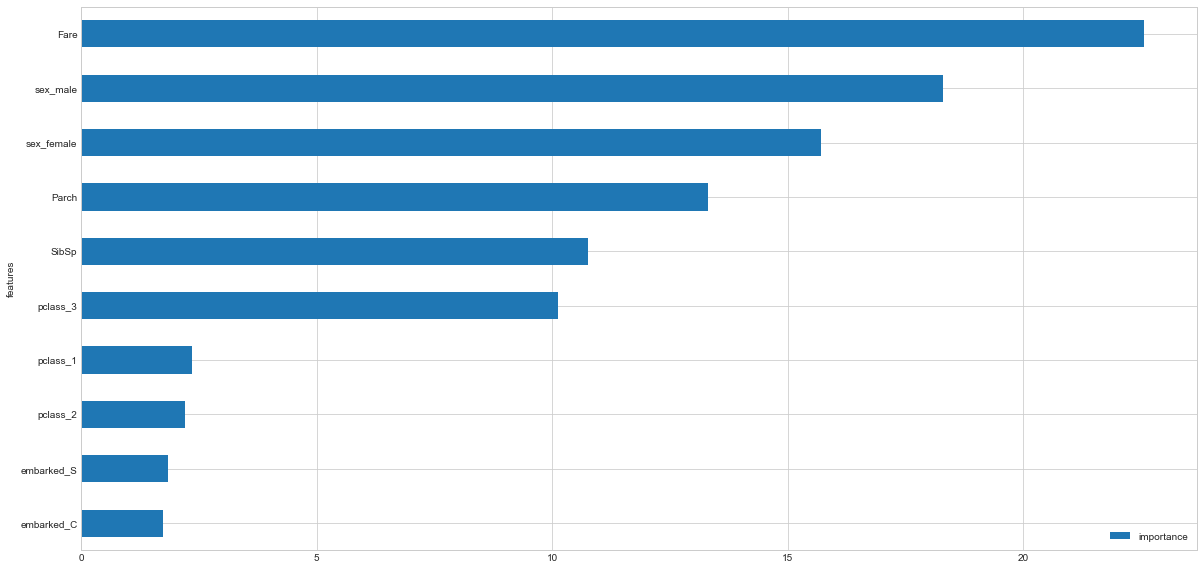

In [78]:
def feature_importance(model, data):
    fea_imp = pd.DataFrame({'importance': model.feature_importances_, 
                           'features': data.columns})
    fea_imp = fea_imp.sort_values(['importance','features'], 
                                  ascending=[True, False]).iloc[-10:]
    _ = fea_imp.plot(kind = 'barh', x = 'features', 
                     y = 'importance', figsize = (20,10))
    return fea_imp
#plt.savefig('catboost_feature_importance.png')
feature_importance(catboost_model, TrainData)

Note:
Precision: A metric which measures a models ability to correctly identify onely relevant instances
Recall: A metric which measures a models ability to find all the relevant cases in a dataset
Combination of precision and recall gives F1 score


In [79]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']
eval_metrics = catboost_model.eval_metrics(train_pool, 
                                           metrics = metrics, 
                                           plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [80]:
for metric in metrics:
    print(str(metric)+":{}".format(np.mean(eval_metrics[metric])))

Precision:0.8509043105250041
Recall:0.6889176470588236
F1:0.7613392114120545
AUC:0.894183183327976


Low recall means there's a higher amount of false negatives(predicting did not survibed when it actually survived

Precision is higher means less false positive(i.e predicting survibed when it actually not survibed)



Submission into kaggle:

In [81]:
TrainData.head(2)

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0


In [82]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [165]:
#One hot encode the columns of the test data
test_embarked_one_hot = pd.get_dummies(test['Embarked'],
                                       prefix = 'embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'],
                                       prefix = 'sex')

test_pclass_one_hot = pd.get_dummies(test['Pclass'],
                                       prefix = 'pclass')

In [166]:
#Combine the test one hot encoded columns with the test data
test = pd.concat([test,
                 test_embarked_one_hot,
                  test_sex_one_hot,
                 test_pclass_one_hot], axis = 1)
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1


In [167]:
test = test.fillna(0)
test.shape

(418, 19)

In [168]:
test = test.drop(['Pclass', 'Name', 'Sex', 'Age'], axis = 1)
test.head(2)

,PassengerId,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,0,0,330911,7.8292,0,Q,0,1,0,0,1,0,0,1
1,893,1,0,363272,7.0000,0,S,0,0,1,1,0,0,0,1


In [169]:
test.isnull().sum()

PassengerId    0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
embarked_C     0
embarked_Q     0
embarked_S     0
sex_female     0
sex_male       0
pclass_1       0
pclass_2       0
pclass_3       0
dtype: int64

In [170]:
test = test.drop(['Cabin', 'Embarked'], axis = 1)
test = test.drop(['Ticket'], axis = 1)
#test = test.fillna(mode())

Now the train and test dataset has same type of data with equal number of columns

In [171]:
test.shape, TrainData.shape

((418, 12), (889, 11))

In [172]:
test1 = test.drop(['PassengerId'], axis = 1)
test1.shape, TrainData.shape

((418, 11), (889, 11))

In [119]:
TrainData.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


Now test and train data are in same format. Now we can make prediction on the test data

In [174]:
#making a prediction using the catboost model on the test dataset
predictions = catboost_model.predict(test1)

In [175]:
#Create a submission dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived']  = predictions #assigning the model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [176]:
#The submission data should look like the following
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [177]:
#Converting submission dataframe 'Survived' column into integers
submission['Survived'] = submission['Survived'].astype(int)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [178]:
#checking the test and submission dataframe has same length or no
if len(submission) == len(test):
    print("Submission dataframe has same length as test dataframe: {} rows".format(len(submission)))
else:
    print("Dataframe mismatched and  not be able to submit to Kaggle")

Submission dataframe has same length as test dataframe: 418 rows


In [179]:
#converting submission dataframe into csv format
submission.to_csv('catboost_sibmission.csv', index = False)
print("submissin CSV is ready")

submissin CSV is ready


In [180]:
#checking the submission csv to make it is in right format
submission_check = pd.read_csv("catboost_sibmission.csv")
submission_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
